## Scores vs. Predicted scores

Intercept: 53.21740277715182

Coefficients:
 gender                                            4.520714
lunch                                            11.523997
test_preparation_course                           5.874513
race/ethnicity_group B                            0.182362
race/ethnicity_group C                            0.602873
race/ethnicity_group D                            3.612132
race/ethnicity_group E                            9.077935
parental level of education_bachelor's degree     3.119051
parental level of education_high school          -4.090503
parental level of education_master's degree       1.074605
parental level of education_some college         -0.145008
parental level of education_some high school     -2.896392
dtype: float64


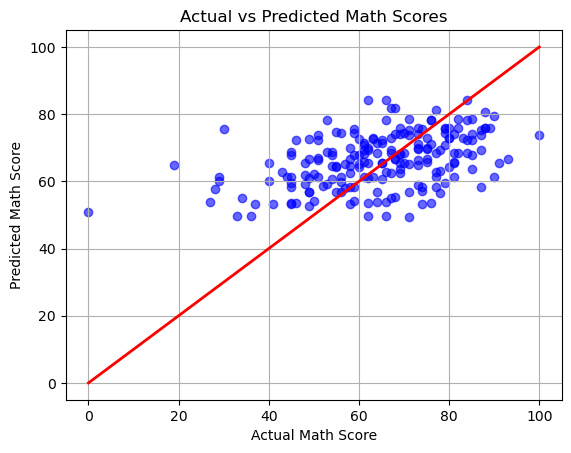

Mean Squared Error (MSE):  200.51084564367287
Root of Mean Squared Error (RMSE):  14.160185226319353


In [4]:
# Linear Regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

df = pd.read_csv('StudentsPerformance.csv') 

df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['lunch'] = df['lunch'].map({'free/reduced': 0, 'standard': 1})
df['test_preparation_course'] = df['test preparation course'].map({'none': 0, 'completed': 1})

df = pd.get_dummies(df, columns=['race/ethnicity', 'parental level of education'], drop_first=True)

X = df.drop(columns=['math score', 'reading score', 'writing score', 'test preparation course'])
y = df['math score']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nCoefficients:\n", coefficients)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)
print("Root of Mean Squared Error (RMSE): ", math.sqrt(mse))

Random Forest Regressor:
Mean Squared Error (MSE): 247.70
Root Mean Squared Error (RMSE): 15.74

Top Feature Importances:
lunch                                            0.251901
test_preparation_course                          0.101901
gender                                           0.099643
race/ethnicity_group E                           0.090754
parental level of education_high school          0.063634
race/ethnicity_group C                           0.062367
race/ethnicity_group B                           0.061496
parental level of education_bachelor's degree    0.061126
parental level of education_some college         0.059608
parental level of education_some high school     0.057322
dtype: float64


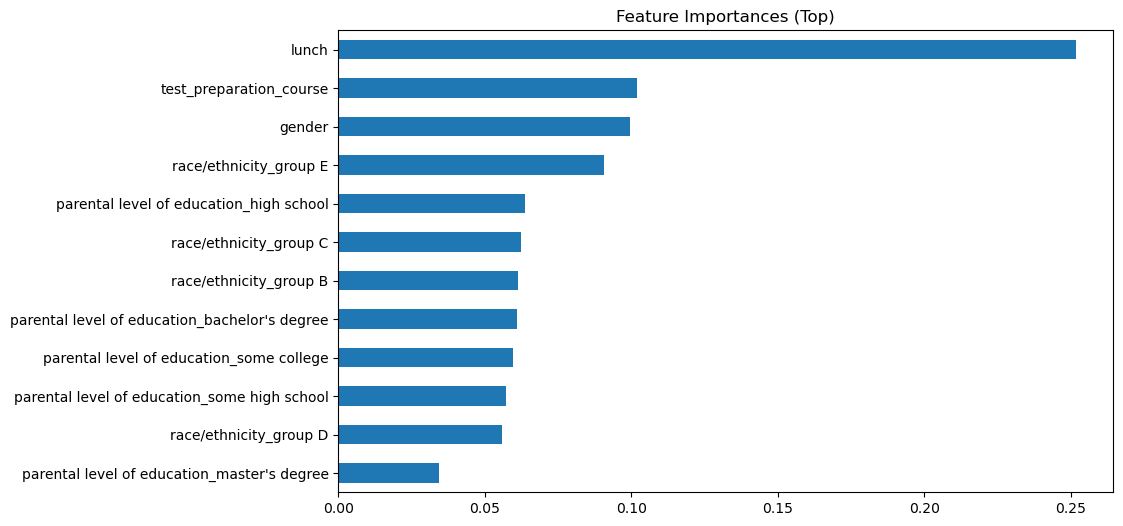

In [6]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("\nTop Feature Importances:")
print(importances.head(10))

importances.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances (Top)")
plt.gca().invert_yaxis()
plt.show()

In [8]:
# Tuning Random Forest because somehow my linear regressor outperformed my random forest regressor

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_best_pred = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

best_mse = mean_squared_error(y_test, y_best_pred)
best_rmse = np.sqrt(best_mse)

print("Best Random Forest Parameters:", grid_search.best_params_)
print(f"Tuned RMSE: {best_rmse:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Tuned RMSE: 14.88
